In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import docx

In [2]:
df = pd.read_csv('calls.tsv.gz', sep='\t')  #5 mil bases
df

#50,285 rows

,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,HAP_CN,CORRECTED_HAP_CN
0,chr1,0,5000000,CAAAAAAAAAAAAA,315060,2532,0.712366,69,98,0.586826,1,1|1,1|1
1,chr1,0,5000000,CAAAAAAAAAAAAC,315060,8367,1.390151,315,239,0.431408,1,1|1,1|1
2,chr1,0,5000000,CAAAAAAAAAAAAG,315060,3012,0.971782,83,124,0.599034,1,1|2,1|1
3,chr1,0,5000000,CAAAAAAAAAAAAT,315060,3062,0.646625,138,35,0.202312,1,2|0,2|0
4,chr1,0,5000000,CAAAAAAAAAAACA,315060,4975,0.906145,141,137,0.492806,1,1|1,1|1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50280,chr22,50000000,50818468,CAAAAAAAAACCCC,65116,2572,1.765076,39,37,0.486842,31,2|2,2|2
50281,chr22,50000000,50818468,CAAAAAAAAACCCG,65116,1284,1.308514,16,6,0.272727,31,1|2,2|2
50282,chr22,50000000,50818468,CAAAAAAAAACCCT,65116,2434,1.319265,15,21,0.583333,31,1|1,1|1
50283,chr22,50000000,50818468,CAAAAAAAAACCGA,65116,805,1.120815,16,5,0.238095,31,1|1,1|1


In [3]:
len(df['CELL'].unique())  #no. of cells in df

89

In [4]:
df['CHR'] = df['#CHR'].str.replace('chr','').astype(int) #CHR COLUMN


df['TOTAL_CN'] = df['CORRECTED_HAP_CN'].str.split('|', expand=True).astype(int).sum(axis=1)  #TOTAL CN COLUMN (using corrected HAP_CN column, ask Simone)
df

,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,HAP_CN,CORRECTED_HAP_CN,CHR,TOTAL_CN
0,chr1,0,5000000,CAAAAAAAAAAAAA,315060,2532,0.712366,69,98,0.586826,1,1|1,1|1,1,2
1,chr1,0,5000000,CAAAAAAAAAAAAC,315060,8367,1.390151,315,239,0.431408,1,1|1,1|1,1,2
2,chr1,0,5000000,CAAAAAAAAAAAAG,315060,3012,0.971782,83,124,0.599034,1,1|2,1|1,1,2
3,chr1,0,5000000,CAAAAAAAAAAAAT,315060,3062,0.646625,138,35,0.202312,1,2|0,2|0,1,2
4,chr1,0,5000000,CAAAAAAAAAAACA,315060,4975,0.906145,141,137,0.492806,1,1|1,1|1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50280,chr22,50000000,50818468,CAAAAAAAAACCCC,65116,2572,1.765076,39,37,0.486842,31,2|2,2|2,22,4
50281,chr22,50000000,50818468,CAAAAAAAAACCCG,65116,1284,1.308514,16,6,0.272727,31,1|2,2|2,22,4
50282,chr22,50000000,50818468,CAAAAAAAAACCCT,65116,2434,1.319265,15,21,0.583333,31,1|1,1|1,22,2
50283,chr22,50000000,50818468,CAAAAAAAAACCGA,65116,805,1.120815,16,5,0.238095,31,1|1,1|1,22,2


Scatterplot to analyse a single random unique cell from the DF

NO. of unique cells

In [5]:
len(df['CELL'].unique()) # 1447 unique cells

89

prop unique cells in OS_1_DF = 0.175%  chisel DF = 0.175% unique, so around the same


------------------------------------------------------------------------------------------------------------------------------------------------

Heatmap showing genome-wide RDRs of all cells in the OS_1_DF

In [6]:
df

,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,HAP_CN,CORRECTED_HAP_CN,CHR,TOTAL_CN
0,chr1,0,5000000,CAAAAAAAAAAAAA,315060,2532,0.712366,69,98,0.586826,1,1|1,1|1,1,2
1,chr1,0,5000000,CAAAAAAAAAAAAC,315060,8367,1.390151,315,239,0.431408,1,1|1,1|1,1,2
2,chr1,0,5000000,CAAAAAAAAAAAAG,315060,3012,0.971782,83,124,0.599034,1,1|2,1|1,1,2
3,chr1,0,5000000,CAAAAAAAAAAAAT,315060,3062,0.646625,138,35,0.202312,1,2|0,2|0,1,2
4,chr1,0,5000000,CAAAAAAAAAAACA,315060,4975,0.906145,141,137,0.492806,1,1|1,1|1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50280,chr22,50000000,50818468,CAAAAAAAAACCCC,65116,2572,1.765076,39,37,0.486842,31,2|2,2|2,22,4
50281,chr22,50000000,50818468,CAAAAAAAAACCCG,65116,1284,1.308514,16,6,0.272727,31,1|2,2|2,22,4
50282,chr22,50000000,50818468,CAAAAAAAAACCCT,65116,2434,1.319265,15,21,0.583333,31,1|1,1|1,22,2
50283,chr22,50000000,50818468,CAAAAAAAAACCGA,65116,805,1.120815,16,5,0.238095,31,1|1,1|1,22,2


In [7]:
pt_RDR = pd.pivot_table(data=df, index='CELL', columns= ['CHR', 'START', 'END'], values='RDR')
pt_RDR

CHR                   1                                                     \
START           0         5000000   10000000  15000000  20000000  25000000   
END             5000000   10000000  15000000  20000000  25000000  30000000   
CELL                                                                         
CAAAAAAAAAAAAA  0.712366  0.996573  0.748176  0.847007  0.564100  0.568095   
CAAAAAAAAAAAAC  1.390151  0.993749  1.183504  1.210837  1.366628  1.417809   
CAAAAAAAAAAAAG  0.971782  1.155977  0.978953  0.955387  1.017712  1.096183   
CAAAAAAAAAAAAT  0.646625  0.684616  0.663523  0.689843  0.670933  0.726285   
CAAAAAAAAAAACA  0.906145  0.897206  0.801986  0.669690  0.517507  0.734528   
...                  ...       ...       ...       ...       ...       ...   
CAAAAAAAAACCCC  0.659254  0.716101  0.745955  0.621320  0.671625  0.671095   
CAAAAAAAAACCCG  0.641561  0.799623  0.875189  0.717708  0.705670  0.708922   
CAAAAAAAAACCCT  1.043827  1.016556  1.117339  0.812264  0.935373  1.187673   
CAAAAAAAAACCGA  1.091478  1.102870  1.199921  1.160148  1.169329  0.988658   
CAAAAAAAAACCGC  0.748843  0.993703  0.788236  0.812464  0.972792  1.127531   

CHR                                                     ...        21  \
START           30000000  35000000  40000000  45000000  ...  40000000   
END             35000000  40000000  45000000  50000000  ...  45000000   
CELL                                                    ...             
CAAAAAAAAAAAAA  0.817672  0.859448  0.691584  0.800647  ...  0.868133   
CAAAAAAAAAAAAC  1.325826  0.981016  1.131756  1.058377  ...  0.822057   
CAAAAAAAAAAAAG  1.049271  1.039656  1.173991  1.037014  ...  0.944355   
CAAAAAAAAAAAAT  0.706619  0.782781  0.677916  0.761812  ...  1.267112   
CAAAAAAAAAAACA  0.765891  0.756200  0.898427  0.870280  ...  1.072825   
...                  ...       ...       ...       ...  ...       ...   
CAAAAAAAAACCCC  0.716673  0.806229  0.637856  0.631207  ...  1.398900   
CAAAAAAAAACCCG  0.763430  0.735134  0.845671  0.692834  ...  1.426120   
CAAAAAAAAACCCT  1.147589  1.231496  0.819755  0.712499  ...  1.268106   
CAAAAAAAAACCGA  1.036499  0.989933  1.039120  1.333900  ...  1.540109   
CAAAAAAAAACCGC  0.825612  0.789294  1.364844  1.131835  ...  0.961409   

CHR                             22                                          \
START           45000000  15000000  20000000  25000000  30000000  35000000   
END             46709983  20000000  25000000  30000000  35000000  40000000   
CELL                                                                         
CAAAAAAAAAAAAA  0.855935  1.005546  0.843584  1.078961  0.743457  0.698231   
CAAAAAAAAAAAAC  0.724844  0.943786  0.939554  0.708039  0.646302  1.152875   
CAAAAAAAAAAAAG  1.022405  0.906000  0.929185  0.885905  0.843363  0.908313   
CAAAAAAAAAAAAT  1.256662  0.986009  0.963447  0.805228  0.733833  0.683853   
CAAAAAAAAAAACA  0.907285  0.982421  0.922450  1.005472  1.071639  0.965048   
...                  ...       ...       ...       ...       ...       ...   
CAAAAAAAAACCCC  1.456400  1.087699  1.087266  1.426627  1.192771  1.304652   
CAAAAAAAAACCCG  1.246892  0.956617  1.012223  1.182635  1.001574  0.866247   
CAAAAAAAAACCCT  1.743945  1.307613  1.457116  1.282193  1.292902  1.422189   
CAAAAAAAAACCGA  0.979551  1.064443  1.104267  0.888121  0.970863  0.914297   
CAAAAAAAAACCGC  0.918559  0.791827  0.907533  0.927633  1.336458  1.348244   

CHR                                           
START           40000000  45000000  50000000  
END             45000000  50000000  50818468  
CELL                                          
CAAAAAAAAAAAAA  0.537956  0.801414  0.638437  
CAAAAAAAAAAAAC  1.281547  0.912414  0.875438  
CAAAAAAAAAAAAG  0.862247  0.871929  0.757114  
CAAAAAAAAAAAAT  1.195173  1.331878  1.464196  
CAAAAAAAAAAACA  0.936248  0.917357  0.859241  
...                  ...       ...       ...  
CAAAAAAAAACCCC  1.556789  1.289964  1.765076  
CAAAAAAAAACCCG  1.192040  1.292179  1.308514 

Before I make finished heatmap, need to add chromosome axis

In [8]:
chromosome_colours= {1:'black', 2:'gray', 3:'black', 4:'gray', 5:'black', 6:'gray',
                     7:'black', 8:'gray', 9:'black', 10:'gray', 11:'black', 12:'gray',
                     13:'black', 14:'gray', 15:'black', 16:'gray', 17:'black', 18:'gray',
                     19:'black', 20:'gray', 21:'black', 22:'gray'}
#making a dictionary corresponding to the chromosomes and the colours we want them to be in the heatmap


df['COLOUR']=df['CHR'].map(chromosome_colours) #adding a column to the df called colours, where colour mapped to the chromosome

#new df called df_colours, 

df_colours=df[['CHR', 'START', 'END', 'COLOUR']]

chrome_colours = df_colours.drop_duplicates().set_index(['CHR', 'START', 'END'])
chrome_colours


COLOUR
CHR START    END            
1   0        5000000   black
    5000000  10000000  black
    10000000 15000000  black
    15000000 20000000  black
    20000000 25000000  black
...                      ...
22  30000000 35000000   gray
    35000000 40000000   gray
    40000000 45000000   gray
    45000000 50000000   gray
    50000000 50818468   gray

[565 rows x 1 columns]

/Users/elise/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1200x600 with 0 Axes>

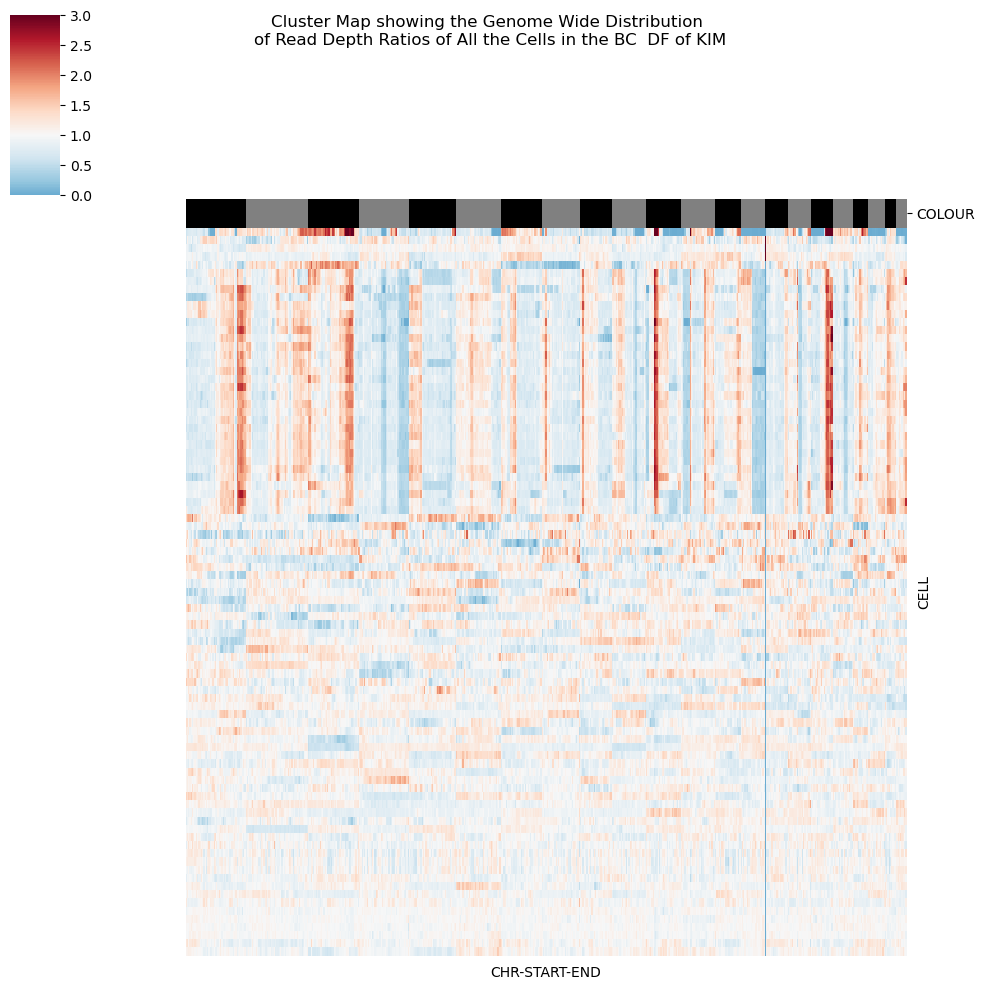

In [9]:
plt.figure(figsize= (12, 6))

genome_RDR_heatmap = sns.clustermap(data = pt_RDR, vmin=0, vmax=3,cmap='RdBu_r', center=1, xticklabels= False, 
                                    yticklabels = False, col_cluster= False, col_colors=chrome_colours)
genome_RDR_heatmap.ax_row_dendrogram.set_visible(False)

genome_RDR_heatmap.fig.suptitle("""Cluster Map showing the Genome Wide Distribution 
of Read Depth Ratios of All the Cells in the BC  DF of KIM""")

genome_RDR_heatmap


Aim: Make a plot showing genome-wide HDs of all cells

In [10]:
df

,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,HAP_CN,CORRECTED_HAP_CN,CHR,TOTAL_CN,COLOUR
0,chr1,0,5000000,CAAAAAAAAAAAAA,315060,2532,0.712366,69,98,0.586826,1,1|1,1|1,1,2,black
1,chr1,0,5000000,CAAAAAAAAAAAAC,315060,8367,1.390151,315,239,0.431408,1,1|1,1|1,1,2,black
2,chr1,0,5000000,CAAAAAAAAAAAAG,315060,3012,0.971782,83,124,0.599034,1,1|2,1|1,1,2,black
3,chr1,0,5000000,CAAAAAAAAAAAAT,315060,3062,0.646625,138,35,0.202312,1,2|0,2|0,1,2,black
4,chr1,0,5000000,CAAAAAAAAAAACA,315060,4975,0.906145,141,137,0.492806,1,1|1,1|1,1,2,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50280,chr22,50000000,50818468,CAAAAAAAAACCCC,65116,2572,1.765076,39,37,0.486842,31,2|2,2|2,22,4,gray
50281,chr22,50000000,50818468,CAAAAAAAAACCCG,65116,1284,1.308514,16,6,0.272727,31,1|2,2|2,22,4,gray
50282,chr22,50000000,50818468,CAAAAAAAAACCCT,65116,2434,1.319265,15,21,0.583333,31,1|1,1|1,22,2,gray
50283,chr22,50000000,50818468,CAAAAAAAAACCGA,65116,805,1.120815,16,5,0.238095,31,1|1,1|1,22,2,gray


In [11]:
df['HOMO_DEL'] = np.where(df['RDR'] <= 0.01350, True, False)
df

,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,HAP_CN,CORRECTED_HAP_CN,CHR,TOTAL_CN,COLOUR,HOMO_DEL
0,chr1,0,5000000,CAAAAAAAAAAAAA,315060,2532,0.712366,69,98,0.586826,1,1|1,1|1,1,2,black,False
1,chr1,0,5000000,CAAAAAAAAAAAAC,315060,8367,1.390151,315,239,0.431408,1,1|1,1|1,1,2,black,False
2,chr1,0,5000000,CAAAAAAAAAAAAG,315060,3012,0.971782,83,124,0.599034,1,1|2,1|1,1,2,black,False
3,chr1,0,5000000,CAAAAAAAAAAAAT,315060,3062,0.646625,138,35,0.202312,1,2|0,2|0,1,2,black,False
4,chr1,0,5000000,CAAAAAAAAAAACA,315060,4975,0.906145,141,137,0.492806,1,1|1,1|1,1,2,black,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50280,chr22,50000000,50818468,CAAAAAAAAACCCC,65116,2572,1.765076,39,37,0.486842,31,2|2,2|2,22,4,gray,False
50281,chr22,50000000,50818468,CAAAAAAAAACCCG,65116,1284,1.308514,16,6,0.272727,31,1|2,2|2,22,4,gray,False
50282,chr22,50000000,50818468,CAAAAAAAAACCCT,65116,2434,1.319265,15,21,0.583333,31,1|1,1|1,22,2,gray,False
50283,chr22,50000000,50818468,CAAAAAAAAACCGA,65116,805,1.120815,16,5,0.238095,31,1|1,1|1,22,2,gray,False


DF to show how many rows have HDs

In [12]:
df_HD=df[df['HOMO_DEL'] == True]
df_HD

#232 regions

,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,HAP_CN,CORRECTED_HAP_CN,CHR,TOTAL_CN,COLOUR,HOMO_DEL
40361,chr14,105000000,107043718,CAAAAAAAAAAGTA,149373,25,0.012971,0,0,0.5,40,1|1,1|1,14,2,gray,True
40406,chr15,15000000,20000000,CAAAAAAAAAAAAA,0,0,0.000000,0,0,0.5,23,0|0,0|0,15,0,black,True
40407,chr15,15000000,20000000,CAAAAAAAAAAAAC,0,0,0.000000,0,0,0.5,23,0|0,0|0,15,0,black,True
40408,chr15,15000000,20000000,CAAAAAAAAAAAAG,0,0,0.000000,0,0,0.5,23,0|0,0|0,15,0,black,True
40409,chr15,15000000,20000000,CAAAAAAAAAAAAT,0,0,0.000000,0,0,0.5,23,0|0,0|0,15,0,black,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40490,chr15,15000000,20000000,CAAAAAAAAACCCC,0,0,0.000000,0,0,0.5,23,0|0,0|0,15,0,black,True
40491,chr15,15000000,20000000,CAAAAAAAAACCCG,0,0,0.000000,0,0,0.5,23,0|0,0|0,15,0,black,True
40492,chr15,15000000,20000000,CAAAAAAAAACCCT,0,0,0.000000,0,0,0.5,23,0|0,0|0,15,0,black,True
40493,chr15,15000000,20000000,CAAAAAAAAACCGA,0,0,0.000000,0,0,0.5,23,0|0,0|0,15,0,black,True


In [13]:
HD_table = pd.pivot_table(data=df, index='CELL', columns=['CHR', 'START', 'END'], values= 'HOMO_DEL') 
HD_table

CHR                  1                                                         \
START          0        5000000  10000000 15000000 20000000 25000000 30000000   
END            5000000  10000000 15000000 20000000 25000000 30000000 35000000   
CELL                                                                            
CAAAAAAAAAAAAA      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
CAAAAAAAAAAAAC      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
CAAAAAAAAAAAAG      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
CAAAAAAAAAAAAT      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
CAAAAAAAAAAACA      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...                 ...      ...      ...      ...      ...      ...      ...   
CAAAAAAAAACCCC      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
CAAAAAAAAACCCG      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
CAAAAAAAAACCCT      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
CAAAAAAAAACCGA      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
CAAAAAAAAACCGC      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

CHR                                        ...       21                22  \
START          35000000 40000000 45000000  ... 40000000 45000000 15000000   
END            40000000 45000000 50000000  ... 45000000 46709983 20000000   
CELL                                       ...                              
CAAAAAAAAAAAAA      0.0      0.0      0.0  ...      0.0      0.0      0.0   
CAAAAAAAAAAAAC      0.0      0.0      0.0  ...      0.0      0.0      0.0   
CAAAAAAAAAAAAG      0.0      0.0      0.0  ...      0.0      0.0      0.0   
CAAAAAAAAAAAAT      0.0      0.0      0.0  ...      0.0      0.0      0.0   
CAAAAAAAAAAACA      0.0      0.0      0.0  ...      0.0      0.0      0.0   
...                 ...      ...      ...  ...      ...      ...      ...   
CAAAAAAAAACCCC      0.0      0.0      0.0  ...      0.0      0.0      0.0   
CAAAAAAAAACCCG      0.0      0.0      0.0  ...      0.0      0.0      0.0   
CAAAAAAAAACCCT      0.0      0.0      0.0  ...      0.0      0.0      0.0   
CAAAAAAAAACCGA      0.0      0.0      0.0  ...      0.0      0.0      0.0   
CAAAAAAAAACCGC      0.0      0.0      0.0  ...      0.0      0.0      0.0   

CHR                                                                            
START          20000000 25000000 30000000 35000000 40000000 45000000 50000000  
END            25000000 30000000 35000000 40000000 45000000 50000000 50818468  
CELL                                                                           
CAAAAAAAAAAAAA      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
CAAAAAAAAAAAAC      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
CAAAAAAAAAAAAG      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
CAAAAAAAAAAAAT      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
CAAAAAAAAAAACA      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
...                 ...      ...      ...      ...      ...      ...      ...  
CAAAAAAAAACCCC      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
CAAAAAAAAACCCG      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
CAAAAAAAAACCCT      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
CAAAAAAAAACCGA      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
CAAAAAAAAACCGC      0.0      0.0      0.0      0.0      0.0      0.0      0.0  

[89 rows x 565 columns]

/Users/elise/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1200x600 with 0 Axes>

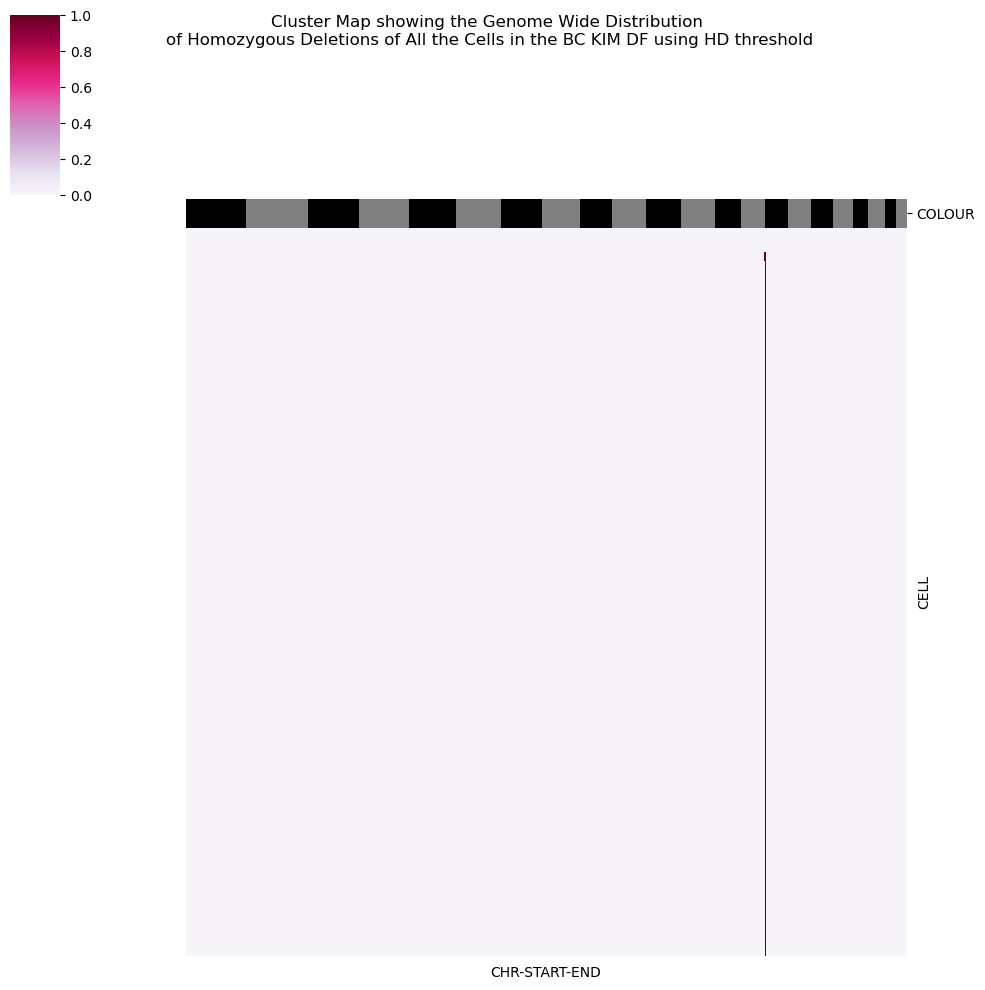

In [14]:
plt.figure(figsize=(12, 6))
HD_heatmap = sns.clustermap(data=HD_table, vmin=0, vmax=1, cmap='PuRd', xticklabels=False, 
                            yticklabels=False, col_cluster=False, row_cluster = True, col_colors=chrome_colours)

HD_heatmap.ax_row_dendrogram.set_visible(False)
HD_heatmap.fig.suptitle("""Cluster Map showing the Genome Wide Distribution 
of Homozygous Deletions of All the Cells in the BC KIM DF using HD threshold""")
HD_heatmap

plt.savefig('Kim_Threshold_HD.png', dpi=300)


oh wow ... it's giving nothing :|

AIM: Heatmap that shows genome-wide distribution of HDs in cells in OS Patient 1 DF that contain at least 1 HD

In [15]:
len(df_HD['CELL'].unique())

86

In [16]:
unique_HD =df_HD['CELL'].unique()
print(unique_HD) 

['CAAAAAAAAAAGTA' 'CAAAAAAAAAAAAA' 'CAAAAAAAAAAAAC' 'CAAAAAAAAAAAAG'
 'CAAAAAAAAAAAAT' 'CAAAAAAAAAAACC' 'CAAAAAAAAAAACG' 'CAAAAAAAAAAACT'
 'CAAAAAAAAAAAGA' 'CAAAAAAAAAAAGC' 'CAAAAAAAAAAAGG' 'CAAAAAAAAAAAGT'
 'CAAAAAAAAAAATA' 'CAAAAAAAAAAATC' 'CAAAAAAAAAAATG' 'CAAAAAAAAAAATT'
 'CAAAAAAAAAACAA' 'CAAAAAAAAAACAC' 'CAAAAAAAAAACAG' 'CAAAAAAAAAACAT'
 'CAAAAAAAAAACCA' 'CAAAAAAAAAACCC' 'CAAAAAAAAAACCG' 'CAAAAAAAAAACCT'
 'CAAAAAAAAAACGA' 'CAAAAAAAAAACGC' 'CAAAAAAAAAACGG' 'CAAAAAAAAAACGT'
 'CAAAAAAAAAACTA' 'CAAAAAAAAAACTC' 'CAAAAAAAAAACTG' 'CAAAAAAAAAACTT'
 'CAAAAAAAAAAGAA' 'CAAAAAAAAAAGAC' 'CAAAAAAAAAAGAG' 'CAAAAAAAAAAGAT'
 'CAAAAAAAAAAGCA' 'CAAAAAAAAAAGCC' 'CAAAAAAAAAAGCG' 'CAAAAAAAAAAGCT'
 'CAAAAAAAAAAGGA' 'CAAAAAAAAAAGGG' 'CAAAAAAAAAAGGT' 'CAAAAAAAAAAGTC'
 'CAAAAAAAAAAGTG' 'CAAAAAAAAAAGTT' 'CAAAAAAAAAATAA' 'CAAAAAAAAAATAC'
 'CAAAAAAAAAATAG' 'CAAAAAAAAAATAT' 'CAAAAAAAAAATCA' 'CAAAAAAAAAATCC'
 'CAAAAAAAAAATCG' 'CAAAAAAAAAATCT' 'CAAAAAAAAAATGA' 'CAAAAAAAAAATGC'
 'CAAAAAAAAAATGG' 'CAAAAAAAAAATGT'

In [17]:
cells_w_HD = df[df['CELL'].isin(unique_HD)]
cells_w_HD

,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,HAP_CN,CORRECTED_HAP_CN,CHR,TOTAL_CN,COLOUR,HOMO_DEL
0,chr1,0,5000000,CAAAAAAAAAAAAA,315060,2532,0.712366,69,98,0.586826,1,1|1,1|1,1,2,black,False
1,chr1,0,5000000,CAAAAAAAAAAAAC,315060,8367,1.390151,315,239,0.431408,1,1|1,1|1,1,2,black,False
2,chr1,0,5000000,CAAAAAAAAAAAAG,315060,3012,0.971782,83,124,0.599034,1,1|2,1|1,1,2,black,False
3,chr1,0,5000000,CAAAAAAAAAAAAT,315060,3062,0.646625,138,35,0.202312,1,2|0,2|0,1,2,black,False
5,chr1,0,5000000,CAAAAAAAAAAACC,315060,5301,0.750469,212,37,0.148594,1,2|0,2|0,1,2,black,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50280,chr22,50000000,50818468,CAAAAAAAAACCCC,65116,2572,1.765076,39,37,0.486842,31,2|2,2|2,22,4,gray,False
50281,chr22,50000000,50818468,CAAAAAAAAACCCG,65116,1284,1.308514,16,6,0.272727,31,1|2,2|2,22,4,gray,False
50282,chr22,50000000,50818468,CAAAAAAAAACCCT,65116,2434,1.319265,15,21,0.583333,31,1|1,1|1,22,2,gray,False
50283,chr22,50000000,50818468,CAAAAAAAAACCGA,65116,805,1.120815,16,5,0.238095,31,1|1,1|1,22,2,gray,False


In [18]:
HD_updated_table = pd.pivot_table(data=cells_w_HD, index='CELL', columns=['CHR', 'START', 'END'], values= 'HOMO_DEL') 
HD_updated_table

CHR                  1                                                         \
START          0        5000000  10000000 15000000 20000000 25000000 30000000   
END            5000000  10000000 15000000 20000000 25000000 30000000 35000000   
CELL                                                                            
CAAAAAAAAAAAAA      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
CAAAAAAAAAAAAC      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
CAAAAAAAAAAAAG      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
CAAAAAAAAAAAAT      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
CAAAAAAAAAAACC      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...                 ...      ...      ...      ...      ...      ...      ...   
CAAAAAAAAACCCC      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
CAAAAAAAAACCCG      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
CAAAAAAAAACCCT      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
CAAAAAAAAACCGA      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
CAAAAAAAAACCGC      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

CHR                                        ...       21                22  \
START          35000000 40000000 45000000  ... 40000000 45000000 15000000   
END            40000000 45000000 50000000  ... 45000000 46709983 20000000   
CELL                                       ...                              
CAAAAAAAAAAAAA      0.0      0.0      0.0  ...      0.0      0.0      0.0   
CAAAAAAAAAAAAC      0.0      0.0      0.0  ...      0.0      0.0      0.0   
CAAAAAAAAAAAAG      0.0      0.0      0.0  ...      0.0      0.0      0.0   
CAAAAAAAAAAAAT      0.0      0.0      0.0  ...      0.0      0.0      0.0   
CAAAAAAAAAAACC      0.0      0.0      0.0  ...      0.0      0.0      0.0   
...                 ...      ...      ...  ...      ...      ...      ...   
CAAAAAAAAACCCC      0.0      0.0      0.0  ...      0.0      0.0      0.0   
CAAAAAAAAACCCG      0.0      0.0      0.0  ...      0.0      0.0      0.0   
CAAAAAAAAACCCT      0.0      0.0      0.0  ...      0.0      0.0      0.0   
CAAAAAAAAACCGA      0.0      0.0      0.0  ...      0.0      0.0      0.0   
CAAAAAAAAACCGC      0.0      0.0      0.0  ...      0.0      0.0      0.0   

CHR                                                                            
START          20000000 25000000 30000000 35000000 40000000 45000000 50000000  
END            25000000 30000000 35000000 40000000 45000000 50000000 50818468  
CELL                                                                           
CAAAAAAAAAAAAA      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
CAAAAAAAAAAAAC      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
CAAAAAAAAAAAAG      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
CAAAAAAAAAAAAT      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
CAAAAAAAAAAACC      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
...                 ...      ...      ...      ...      ...      ...      ...  
CAAAAAAAAACCCC      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
CAAAAAAAAACCCG      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
CAAAAAAAAACCCT      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
CAAAAAAAAACCGA      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
CAAAAAAAAACCGC      0.0      0.0      0.0      0.0      0.0      0.0      0.0  

[86 rows x 565 columns]

/Users/elise/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1200x600 with 0 Axes>

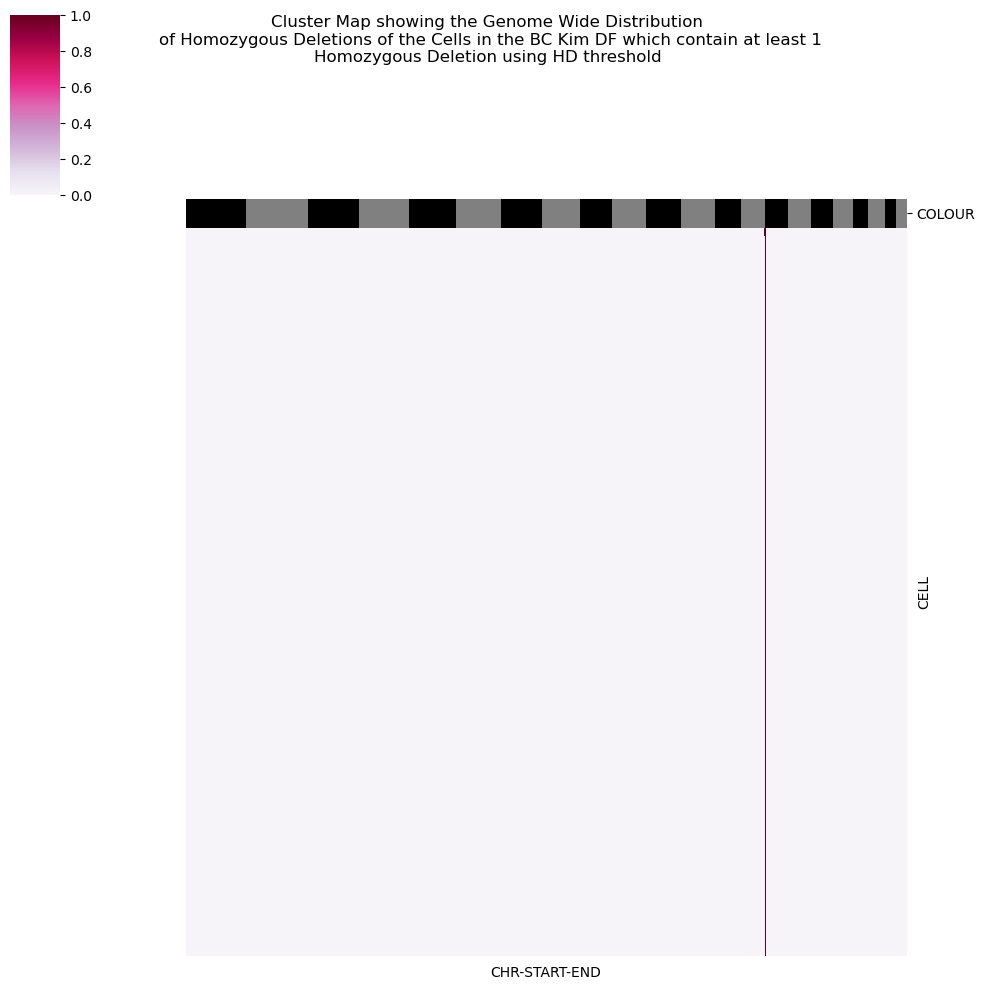

In [19]:
plt.figure(figsize=(12, 6))

HD_heatmap_2 = sns.clustermap(data=HD_updated_table, vmin=0, vmax=1, cmap='PuRd', xticklabels=False, yticklabels=False, 
                              col_cluster=False, row_cluster = True, col_colors=chrome_colours)
HD_heatmap_2.ax_row_dendrogram.set_visible(False)
HD_heatmap_2.fig.suptitle("""Cluster Map showing the Genome Wide Distribution 
of Homozygous Deletions of the Cells in the BC Kim DF which contain at least 1
Homozygous Deletion using HD threshold """)
HD_heatmap_2

plt.savefig('Kim_Threshold_at_least_1_HD.png', dpi=300)


Show total no. HDs that each cell contains

In [20]:
cells_w_HD.groupby('CELL')['HOMO_DEL'].sum() #showing totla no. hDs for each cell throughout genome

CELL
CAAAAAAAAAAAAA    1
CAAAAAAAAAAAAC    1
CAAAAAAAAAAAAG    1
CAAAAAAAAAAAAT    1
CAAAAAAAAAAACC    1
                 ..
CAAAAAAAAACCCC    1
CAAAAAAAAACCCG    1
CAAAAAAAAACCCT    1
CAAAAAAAAACCGA    1
CAAAAAAAAACCGC    1
Name: HOMO_DEL, Length: 86, dtype: int64

Shows total no. HDs that each genomic region contains

In [21]:
group_HD =cells_w_HD.groupby(['CHR', 'START', 'END'])['HOMO_DEL'].sum() 
group_HD

CHR  START     END     
1    0         5000000     0
     5000000   10000000    0
     10000000  15000000    0
     15000000  20000000    0
     20000000  25000000    0
                          ..
22   30000000  35000000    0
     35000000  40000000    0
     40000000  45000000    0
     45000000  50000000    0
     50000000  50818468    0
Name: HOMO_DEL, Length: 565, dtype: int64

creating column called cells w/ HD here, which shows no. cells that have HDs in each genomic region of the DF

In [22]:
cells_w_HD['NCELLS_WITH_HD_HERE'] = cells_w_HD.groupby(['CHR', 'START', 'END'])['HOMO_DEL'].transform('sum')
cells_w_HD.copy()

/var/folders/zj/ww00cy3n0dg4jg01vzxf6z6w0000gp/T/ipykernel_65749/1789297853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cells_w_HD['NCELLS_WITH_HD_HERE'] = cells_w_HD.groupby(['CHR', 'START', 'END'])['HOMO_DEL'].transform('sum')


,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,HAP_CN,CORRECTED_HAP_CN,CHR,TOTAL_CN,COLOUR,HOMO_DEL,NCELLS_WITH_HD_HERE
0,chr1,0,5000000,CAAAAAAAAAAAAA,315060,2532,0.712366,69,98,0.586826,1,1|1,1|1,1,2,black,False,0
1,chr1,0,5000000,CAAAAAAAAAAAAC,315060,8367,1.390151,315,239,0.431408,1,1|1,1|1,1,2,black,False,0
2,chr1,0,5000000,CAAAAAAAAAAAAG,315060,3012,0.971782,83,124,0.599034,1,1|2,1|1,1,2,black,False,0
3,chr1,0,5000000,CAAAAAAAAAAAAT,315060,3062,0.646625,138,35,0.202312,1,2|0,2|0,1,2,black,False,0
5,chr1,0,5000000,CAAAAAAAAAAACC,315060,5301,0.750469,212,37,0.148594,1,2|0,2|0,1,2,black,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50280,chr22,50000000,50818468,CAAAAAAAAACCCC,65116,2572,1.765076,39,37,0.486842,31,2|2,2|2,22,4,gray,False,0
50281,chr22,50000000,50818468,CAAAAAAAAACCCG,65116,1284,1.308514,16,6,0.272727,31,1|2,2|2,22,4,gray,False,0
50282,chr22,50000000,50818468,CAAAAAAAAACCCT,65116,2434,1.319265,15,21,0.583333,31,1|1,1|1,22,2,gray,False,0
50283,chr22,50000000,50818468,CAAAAAAAAACCGA,65116,805,1.120815,16,5,0.238095,31,1|1,1|1,22,2,gray,False,0


Creating a Column with T/F values that indicates whether there are more than 10HDs in a specific genetic locus of the genome

In [23]:
cells_w_HD['HD>10'] = cells_w_HD['NCELLS_WITH_HD_HERE'] > 10  #make a separate column so have both of the conditions being true
cells_w_HD

/var/folders/zj/ww00cy3n0dg4jg01vzxf6z6w0000gp/T/ipykernel_65749/1308990806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cells_w_HD['HD>10'] = cells_w_HD['NCELLS_WITH_HD_HERE'] > 10  #make a separate column so have both of the conditions being true


,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,HAP_CN,CORRECTED_HAP_CN,CHR,TOTAL_CN,COLOUR,HOMO_DEL,NCELLS_WITH_HD_HERE,HD>10
0,chr1,0,5000000,CAAAAAAAAAAAAA,315060,2532,0.712366,69,98,0.586826,1,1|1,1|1,1,2,black,False,0,False
1,chr1,0,5000000,CAAAAAAAAAAAAC,315060,8367,1.390151,315,239,0.431408,1,1|1,1|1,1,2,black,False,0,False
2,chr1,0,5000000,CAAAAAAAAAAAAG,315060,3012,0.971782,83,124,0.599034,1,1|2,1|1,1,2,black,False,0,False
3,chr1,0,5000000,CAAAAAAAAAAAAT,315060,3062,0.646625,138,35,0.202312,1,2|0,2|0,1,2,black,False,0,False
5,chr1,0,5000000,CAAAAAAAAAAACC,315060,5301,0.750469,212,37,0.148594,1,2|0,2|0,1,2,black,False,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50280,chr22,50000000,50818468,CAAAAAAAAACCCC,65116,2572,1.765076,39,37,0.486842,31,2|2,2|2,22,4,gray,False,0,False
50281,chr22,50000000,50818468,CAAAAAAAAACCCG,65116,1284,1.308514,16,6,0.272727,31,1|2,2|2,22,4,gray,False,0,False
50282,chr22,50000000,50818468,CAAAAAAAAACCCT,65116,2434,1.319265,15,21,0.583333,31,1|1,1|1,22,2,gray,False,0,False
50283,chr22,50000000,50818468,CAAAAAAAAACCGA,65116,805,1.120815,16,5,0.238095,31,1|1,1|1,22,2,gray,False,0,False


Creating a separate column where both the conditions of HD>10 (for a specific genetic locus) and HD status of a cell is true

In [24]:
cells_w_HD['cells_with_HD_>10'] = (cells_w_HD['HOMO_DEL'] == True) & (cells_w_HD['HD>10'] == True)
cells_w_HD

/var/folders/zj/ww00cy3n0dg4jg01vzxf6z6w0000gp/T/ipykernel_65749/3652765624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cells_w_HD['cells_with_HD_>10'] = (cells_w_HD['HOMO_DEL'] == True) & (cells_w_HD['HD>10'] == True)


,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,HAP_CN,CORRECTED_HAP_CN,CHR,TOTAL_CN,COLOUR,HOMO_DEL,NCELLS_WITH_HD_HERE,HD>10,cells_with_HD_>10
0,chr1,0,5000000,CAAAAAAAAAAAAA,315060,2532,0.712366,69,98,0.586826,1,1|1,1|1,1,2,black,False,0,False,False
1,chr1,0,5000000,CAAAAAAAAAAAAC,315060,8367,1.390151,315,239,0.431408,1,1|1,1|1,1,2,black,False,0,False,False
2,chr1,0,5000000,CAAAAAAAAAAAAG,315060,3012,0.971782,83,124,0.599034,1,1|2,1|1,1,2,black,False,0,False,False
3,chr1,0,5000000,CAAAAAAAAAAAAT,315060,3062,0.646625,138,35,0.202312,1,2|0,2|0,1,2,black,False,0,False,False
5,chr1,0,5000000,CAAAAAAAAAAACC,315060,5301,0.750469,212,37,0.148594,1,2|0,2|0,1,2,black,False,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50280,chr22,50000000,50818468,CAAAAAAAAACCCC,65116,2572,1.765076,39,37,0.486842,31,2|2,2|2,22,4,gray,False,0,False,False
50281,chr22,50000000,50818468,CAAAAAAAAACCCG,65116,1284,1.308514,16,6,0.272727,31,1|2,2|2,22,4,gray,False,0,False,False
50282,chr22,50000000,50818468,CAAAAAAAAACCCT,65116,2434,1.319265,15,21,0.583333,31,1|1,1|1,22,2,gray,False,0,False,False
50283,chr22,50000000,50818468,CAAAAAAAAACCGA,65116,805,1.120815,16,5,0.238095,31,1|1,1|1,22,2,gray,False,0,False,False


Making a separate DF based off of the rows that have both conditions=True

In [25]:
cells_w_HD_more_than_10_True = cells_w_HD[cells_w_HD['cells_with_HD_>10'] == True]
cells_w_HD_more_than_10_True

,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,HAP_CN,CORRECTED_HAP_CN,CHR,TOTAL_CN,COLOUR,HOMO_DEL,NCELLS_WITH_HD_HERE,HD>10,cells_with_HD_>10
40406,chr15,15000000,20000000,CAAAAAAAAAAAAA,0,0,0.0,0,0,0.5,23,0|0,0|0,15,0,black,True,86,True,True
40407,chr15,15000000,20000000,CAAAAAAAAAAAAC,0,0,0.0,0,0,0.5,23,0|0,0|0,15,0,black,True,86,True,True
40408,chr15,15000000,20000000,CAAAAAAAAAAAAG,0,0,0.0,0,0,0.5,23,0|0,0|0,15,0,black,True,86,True,True
40409,chr15,15000000,20000000,CAAAAAAAAAAAAT,0,0,0.0,0,0,0.5,23,0|0,0|0,15,0,black,True,86,True,True
40411,chr15,15000000,20000000,CAAAAAAAAAAACC,0,0,0.0,0,0,0.5,23,0|0,0|0,15,0,black,True,86,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40490,chr15,15000000,20000000,CAAAAAAAAACCCC,0,0,0.0,0,0,0.5,23,0|0,0|0,15,0,black,True,86,True,True
40491,chr15,15000000,20000000,CAAAAAAAAACCCG,0,0,0.0,0,0,0.5,23,0|0,0|0,15,0,black,True,86,True,True
40492,chr15,15000000,20000000,CAAAAAAAAACCCT,0,0,0.0,0,0,0.5,23,0|0,0|0,15,0,black,True,86,True,True
40493,chr15,15000000,20000000,CAAAAAAAAACCGA,0,0,0.0,0,0,0.5,23,0|0,0|0,15,0,black,True,86,True,True


In [26]:
len(cells_w_HD_more_than_10_True['CHR'].unique()) #only one chromosome, we can see its chromosome 15. YAY! This is interesting

1

In [27]:
cells_w_HD_more_than_10_True_pivot = pd.pivot_table(data=cells_w_HD , index='CELL', columns=['CHR', 'START', 'END'], values= 'cells_with_HD_>10') 
cells_w_HD_more_than_10_True_pivot

CHR                  1                                                         \
START          0        5000000  10000000 15000000 20000000 25000000 30000000   
END            5000000  10000000 15000000 20000000 25000000 30000000 35000000   
CELL                                                                            
CAAAAAAAAAAAAA      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
CAAAAAAAAAAAAC      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
CAAAAAAAAAAAAG      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
CAAAAAAAAAAAAT      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
CAAAAAAAAAAACC      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...                 ...      ...      ...      ...      ...      ...      ...   
CAAAAAAAAACCCC      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
CAAAAAAAAACCCG      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
CAAAAAAAAACCCT      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
CAAAAAAAAACCGA      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
CAAAAAAAAACCGC      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

CHR                                        ...       21                22  \
START          35000000 40000000 45000000  ... 40000000 45000000 15000000   
END            40000000 45000000 50000000  ... 45000000 46709983 20000000   
CELL                                       ...                              
CAAAAAAAAAAAAA      0.0      0.0      0.0  ...      0.0      0.0      0.0   
CAAAAAAAAAAAAC      0.0      0.0      0.0  ...      0.0      0.0      0.0   
CAAAAAAAAAAAAG      0.0      0.0      0.0  ...      0.0      0.0      0.0   
CAAAAAAAAAAAAT      0.0      0.0      0.0  ...      0.0      0.0      0.0   
CAAAAAAAAAAACC      0.0      0.0      0.0  ...      0.0      0.0      0.0   
...                 ...      ...      ...  ...      ...      ...      ...   
CAAAAAAAAACCCC      0.0      0.0      0.0  ...      0.0      0.0      0.0   
CAAAAAAAAACCCG      0.0      0.0      0.0  ...      0.0      0.0      0.0   
CAAAAAAAAACCCT      0.0      0.0      0.0  ...      0.0      0.0      0.0   
CAAAAAAAAACCGA      0.0      0.0      0.0  ...      0.0      0.0      0.0   
CAAAAAAAAACCGC      0.0      0.0      0.0  ...      0.0      0.0      0.0   

CHR                                                                            
START          20000000 25000000 30000000 35000000 40000000 45000000 50000000  
END            25000000 30000000 35000000 40000000 45000000 50000000 50818468  
CELL                                                                           
CAAAAAAAAAAAAA      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
CAAAAAAAAAAAAC      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
CAAAAAAAAAAAAG      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
CAAAAAAAAAAAAT      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
CAAAAAAAAAAACC      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
...                 ...      ...      ...      ...      ...      ...      ...  
CAAAAAAAAACCCC      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
CAAAAAAAAACCCG      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
CAAAAAAAAACCCT      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
CAAAAAAAAACCGA      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
CAAAAAAAAACCGC      0.0      0.0      0.0      0.0      0.0      0.0      0.0  

[86 rows x 565 columns]

/Users/elise/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/elise/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/matrix.py:615: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(0, max_dependent_coord * 1.05)


<Figure size 1200x600 with 0 Axes>

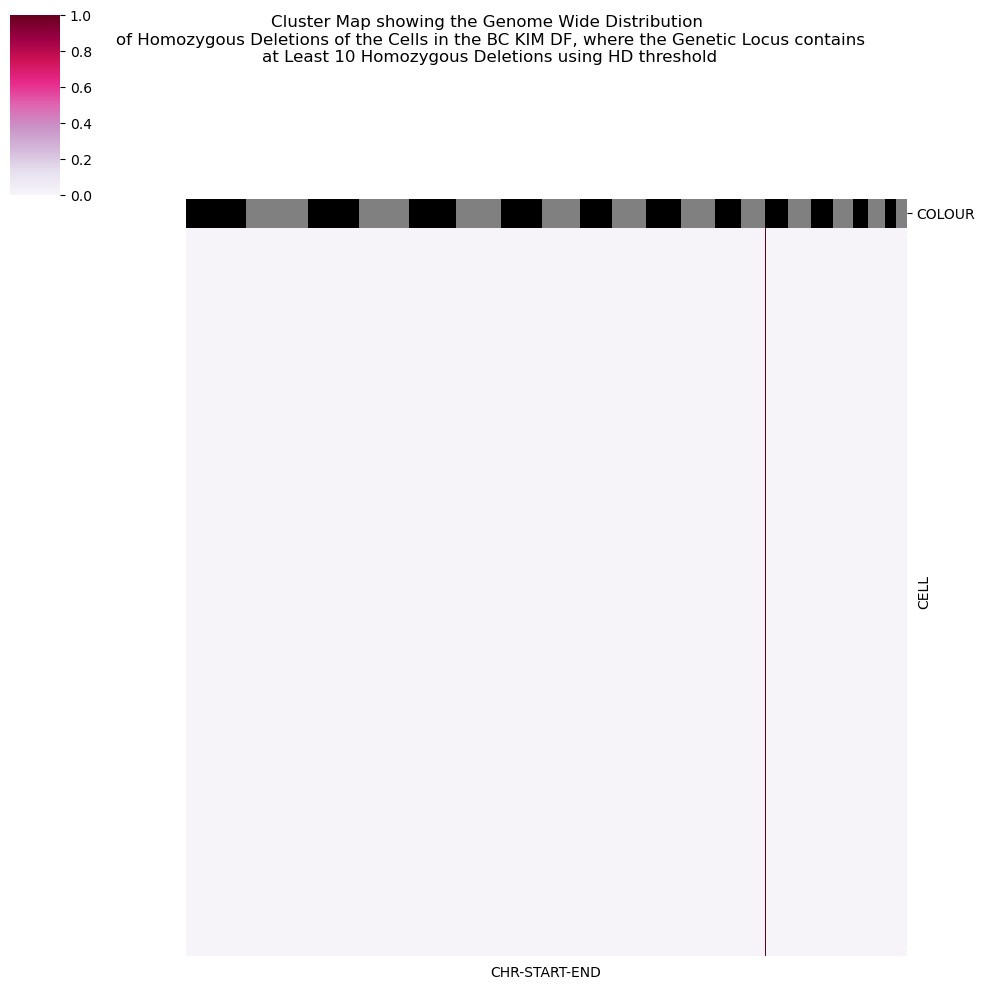

In [28]:
plt.figure(figsize=(12, 6))

HD_exp_heatmap = sns.clustermap(data=cells_w_HD_more_than_10_True_pivot, vmin=0, vmax=1, cmap='PuRd', xticklabels=False, yticklabels=False, 
                              col_cluster=False, row_cluster = True, col_colors=chrome_colours)
HD_exp_heatmap.ax_row_dendrogram.set_visible(False)
HD_exp_heatmap.fig.suptitle("""Cluster Map showing the Genome Wide Distribution 
of Homozygous Deletions of the Cells in the BC KIM DF, where the Genetic Locus contains
at Least 10 Homozygous Deletions using HD threshold""")
HD_exp_heatmap


Making Freq. Plot

In [29]:
df

,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,HAP_CN,CORRECTED_HAP_CN,CHR,TOTAL_CN,COLOUR,HOMO_DEL
0,chr1,0,5000000,CAAAAAAAAAAAAA,315060,2532,0.712366,69,98,0.586826,1,1|1,1|1,1,2,black,False
1,chr1,0,5000000,CAAAAAAAAAAAAC,315060,8367,1.390151,315,239,0.431408,1,1|1,1|1,1,2,black,False
2,chr1,0,5000000,CAAAAAAAAAAAAG,315060,3012,0.971782,83,124,0.599034,1,1|2,1|1,1,2,black,False
3,chr1,0,5000000,CAAAAAAAAAAAAT,315060,3062,0.646625,138,35,0.202312,1,2|0,2|0,1,2,black,False
4,chr1,0,5000000,CAAAAAAAAAAACA,315060,4975,0.906145,141,137,0.492806,1,1|1,1|1,1,2,black,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50280,chr22,50000000,50818468,CAAAAAAAAACCCC,65116,2572,1.765076,39,37,0.486842,31,2|2,2|2,22,4,gray,False
50281,chr22,50000000,50818468,CAAAAAAAAACCCG,65116,1284,1.308514,16,6,0.272727,31,1|2,2|2,22,4,gray,False
50282,chr22,50000000,50818468,CAAAAAAAAACCCT,65116,2434,1.319265,15,21,0.583333,31,1|1,1|1,22,2,gray,False
50283,chr22,50000000,50818468,CAAAAAAAAACCGA,65116,805,1.120815,16,5,0.238095,31,1|1,1|1,22,2,gray,False


In [30]:
df_prop_HD_threshold = df.groupby(['CHR', 'START', 'END'])['RDR'].apply(lambda rdrs: (rdrs <= 0.00383).sum()/len(rdrs)).reset_index().reset_index()
df_prop_HD_threshold.rename(columns={'RDR': 'PROP_HD'}, inplace= True)
df_prop_HD_threshold

,index,CHR,START,END,PROP_HD
0,0,1,0,5000000,0.0
1,1,1,5000000,10000000,0.0
2,2,1,10000000,15000000,0.0
3,3,1,15000000,20000000,0.0
4,4,1,20000000,25000000,0.0
...,...,...,...,...,...
560,560,22,30000000,35000000,0.0
561,561,22,35000000,40000000,0.0
562,562,22,40000000,45000000,0.0
563,563,22,45000000,50000000,0.0


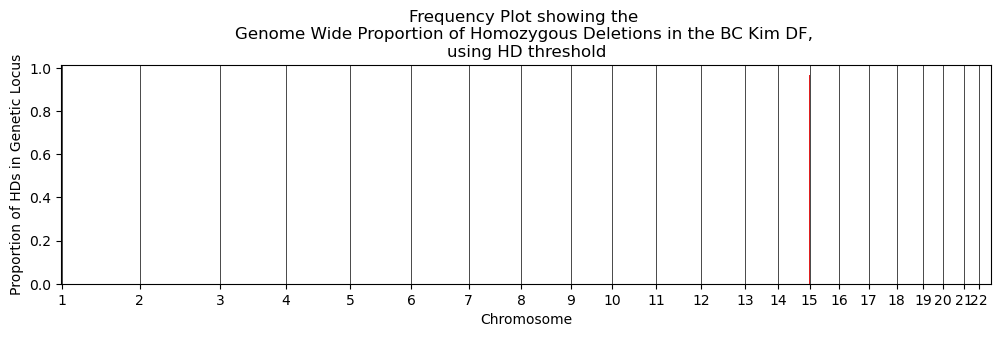

In [31]:
chromosome_pos = df_prop_HD_threshold.groupby('CHR')['index'].first()

plt.figure(figsize=(12,3))

sns.barplot(x= df_prop_HD_threshold['index'], y=df_prop_HD_threshold['PROP_HD'], color= 'red')

plt.xticks(chromosome_pos.values, chromosome_pos.index)

for starting_pos in chromosome_pos.values:
    plt.axvline(x=starting_pos, linewidth=0.5, color='black', linestyle='-')

plt.xlabel('Chromosome')

plt.ylabel('Proportion of HDs in Genetic Locus')

plt.title("""Frequency Plot showing the 
Genome Wide Proportion of Homozygous Deletions in the BC Kim DF, 
using HD threshold""")

plt.gcf().subplots_adjust(bottom=0.15)

plt.savefig('Kim_Freq_Plot.png', dpi=300)


In [32]:
x2 = df_prop_HD_threshold[df_prop_HD_threshold['PROP_HD'] > 0.004] 
x2

,index,CHR,START,END,PROP_HD
454,454,15,15000000,20000000,0.966292


In [52]:
doc = docx.Document()

t = doc.add_table(rows=x2.shape[0], cols=x2.shape[1])

for i in range(x2.shape[0]):
    for j in range(x2.shape[1]):
        cell = x2.iat[i, j]
        t.cell(i, j).text = str(cell)

doc.save('Kim_Threshold_genes_table_threshold.docx')